Calvin Passmore

ECE 5660

# Homework 6

## Problem 3 - Differential Encoding

Sent bits:
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
Received bits:
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
Do the bits match? Yes


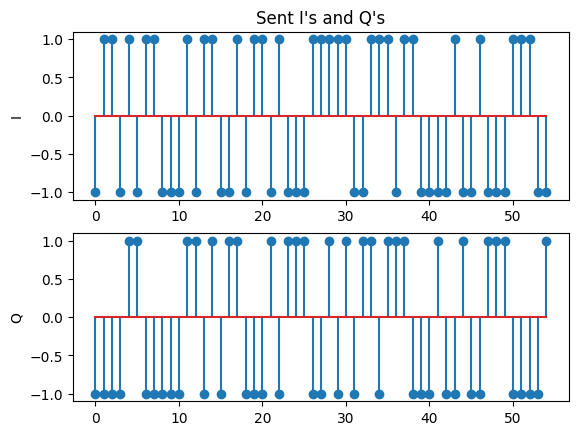

In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
from random import random

################################
# Global Data
################################

diff_phase = {
    '00': '180',
    '01': '-90',
    '10': '0',
    '11': '+90'
    }

diff_bits = {
    '180': '00',
    '-90': '01',
    '0'  : '10',
    '+90': '11'
}

################################
# Encoder
################################

num_bits = 100
            # Every offset    + Random bits
sent_bits = [1,1,1,0,0,1,0,0] + [int(random() > 0.5) for _ in range(num_bits)]

bit_pairs = [f"{sent_bits[i]}{sent_bits[i + 1]}" for i in range(0,len(sent_bits),2)]
bit_phase = [diff_phase[sym] for sym in bit_pairs]

symbols = ['00']
for phase_change in bit_phase:
    if phase_change == '180':
        bits = int(symbols[-1], 2)
        symbols.append(f"{bits ^ 0x3:02b}")
    elif phase_change == '0':
        ## keep it the same
        symbols.append(symbols[-1])
        pass
    elif phase_change == '+90':
        phase_index = int(symbols[-1], 2)
        changes = ['10', '00', '11', '01']
        symbols.append(changes[phase_index])
    else: #'-90'
        phase_index = int(symbols[-1], 2)
        changes = ['01', '11', '00', '10']
        symbols.append(changes[phase_index])

I = [-1 if int(sym[0]) == 0 else 1 for sym in symbols]
Q = [-1 if int(sym[1]) == 0 else 1 for sym in symbols]

plt.figure()
plt.subplot(2,1,1)
plt.title("Sent I's and Q's")
plt.stem(I)
plt.ylabel("I")
plt.subplot(2,1,2)
plt.ylabel("Q")
plt.stem(Q)
plt.savefig("I_Q.png", format='png')


################################
# Decoder
################################

# symbols to bit pairs
X = [0 if point == -1 else 1 for point in I]
Y = [0 if point == -1 else 1 for point in Q]

r_symbols = [f"{X[i]}{Y[i]}" for i in range(len(X))]

# bit pairs to phase changes

positive_change = ['01', '11', '00', '10']
negative_change = ['10', '00', '11', '01']

r_phase_changes = []
for index in range(1,len(r_symbols)):
    previous_sym = r_symbols[index -1]
    curr_sym = r_symbols[index]

    if curr_sym == previous_sym:
        r_phase_changes.append('0')
    elif f"{int(curr_sym, 2) ^ 0x3:02b}" == previous_sym:
        r_phase_changes.append('180')
    elif positive_change[int(curr_sym, 2)] == previous_sym:
        r_phase_changes.append('+90')
    elif negative_change[int(curr_sym,2)] == previous_sym:
        r_phase_changes.append('-90')
    else:
        r_phase_changes.append(f'Error {index}')

# phase changes to data bit pairs
recieved_bit_pairs = [diff_bits[phase] for phase in r_phase_changes]

#data bit pairs to data bits
recieved_bits = []
for bits in recieved_bit_pairs:
    recieved_bits.append(int(bits[0]))
    recieved_bits.append(int(bits[1]))

print(f"Sent bits:")
print(sent_bits)
print("Received bits:")
print(recieved_bits)

print(f"Do the bits match? {'Yes' if sent_bits == recieved_bits else 'No'}")


## Problem 4 - S Curve

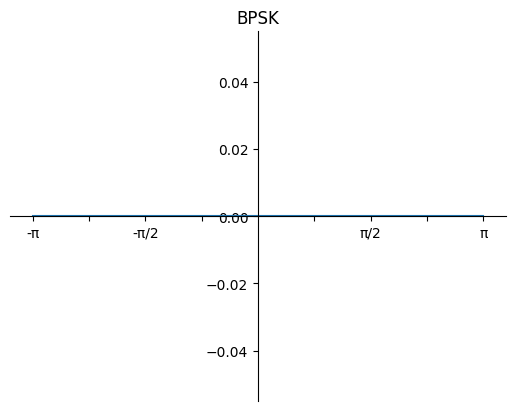

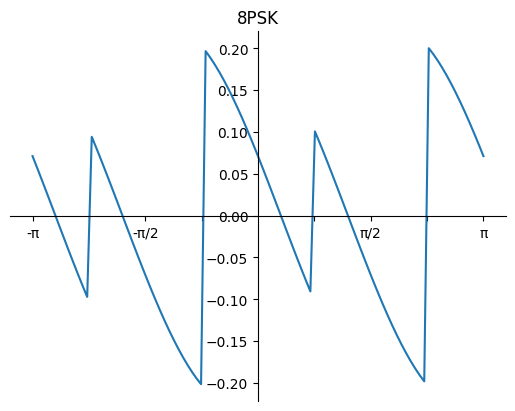

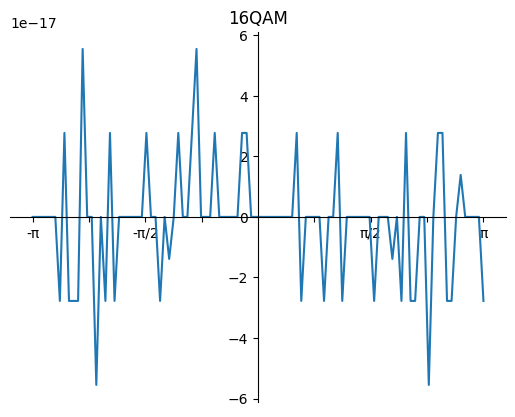

In [2]:
#!/bin/python3
import matplotlib.pyplot as plt
from numpy import linspace, sign
from math import pi, sin, cos
sim_number = 100

def gen_s_curve(constellation_points, filename, K=1):
    data_points = []
    for theta in linspace(-pi, pi, sim_number):
        averages = []
        for point in constellation_points:
            xp = (cos(theta) - sin(theta)) * point[0]
            yp = (sin(theta) + cos(theta)) * point[1]
            a0 = sign(xp)
            a1 = sign(yp)
            ek = (yp * a0) - (xp * a1)
            averages.append(ek)
        data_points.append(sum(averages) / len(averages))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    xtick_points = [-pi,-3*pi/4, -pi/2, -pi/4, pi/4, pi/2, 3*pi/4, pi]
    xtick_labels = ['-π', '', '-π/2', '', '', 'π/2', '', 'π']
    plt.xticks(xtick_points, xtick_labels)
    plt.title(filename.split('.')[0])
    plt.plot(linspace(-pi,pi,sim_number),data_points)
    plt.savefig(filename, format='png')

BPSK = [[-1,0], [1,0]]
eightPSK = [[cos(angle), sin(angle)] for angle in [0, 45, 90, 135, 180, 225, 270, 315, 360]]
sixteenQAM = [
    [ 3,-3], [ 3,-1], [ 3,1], [ 3,3],
    [ 1,-3], [ 1,-1], [ 1,1], [ 1,3],
    [-1,-3], [-1,-1], [-1,1], [-1,3],
    [-3,-3], [-3,-1], [-3,1], [-3,3],
]

gen_s_curve(BPSK, "BPSK.png")
gen_s_curve(eightPSK, "8PSK.png")
gen_s_curve(sixteenQAM,"16QAM.png")
    

## Python 4 - Phase Recovery System

Do the bits match? Yes
Error rate 0.0


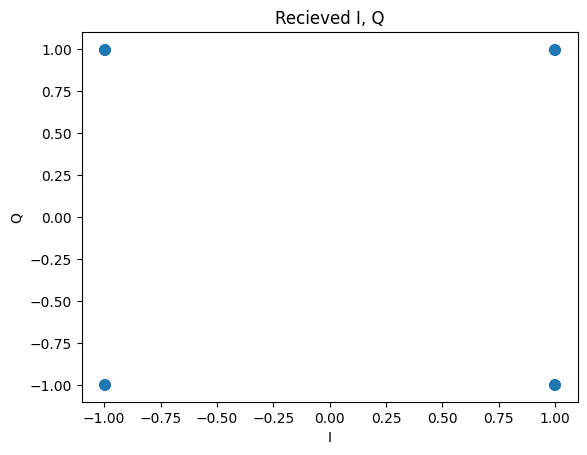

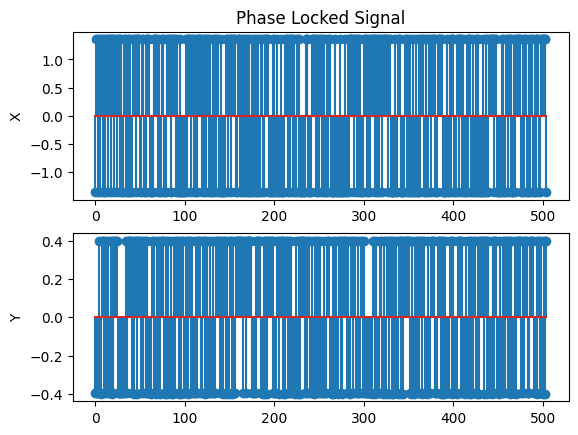

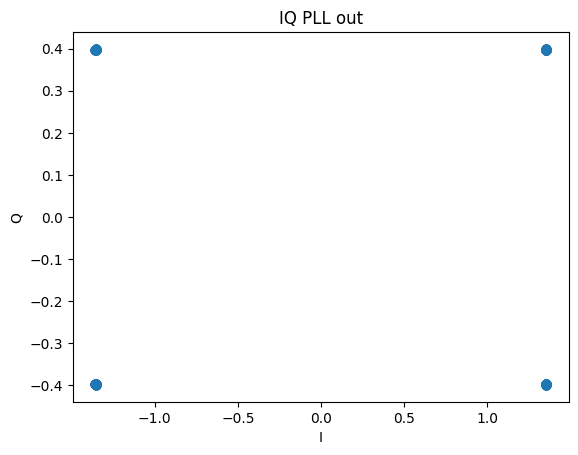

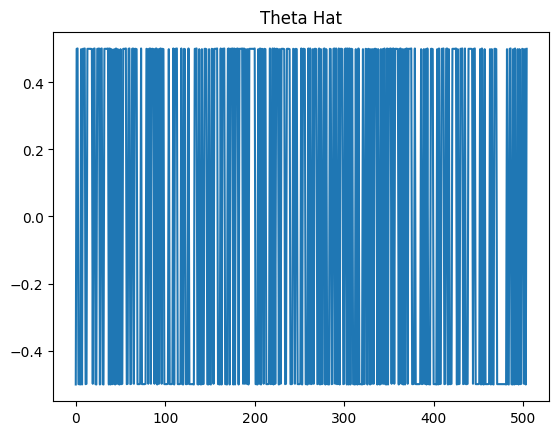

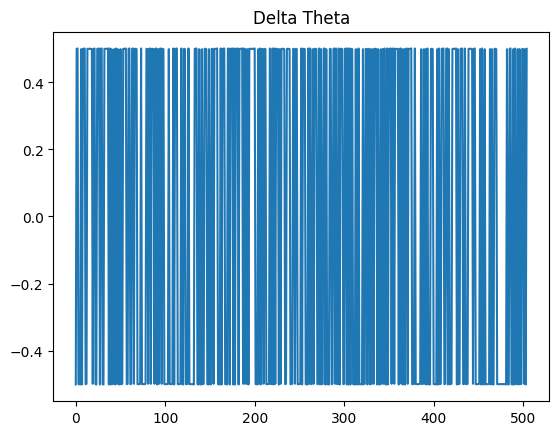

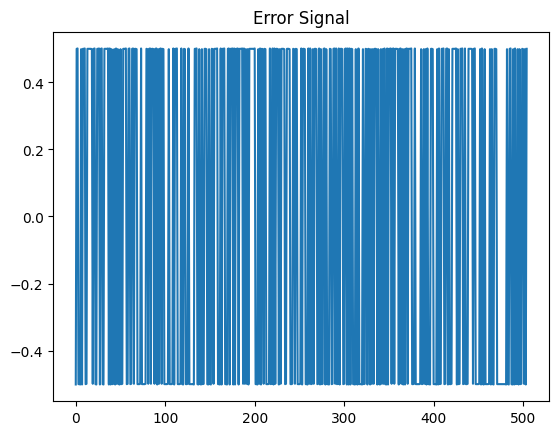

In [3]:
#!/bin/python3
from random import random
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan2, sqrt, floor

def upsample(pulses, num_up):
    sig = np.zeros((len(pulses)*num_up,1))
    sig[range(0,len(pulses)*num_up,num_up)] = np.array(pulses).reshape(len(pulses),1)
    return sig[:,0]

def matched_filter(signal, pulse):
    pulse_reversed = list(reversed(pulse))
    return np.convolve(signal, pulse)

def sample_signal(sig, sample_time, Lp=0):
    sampled = []
    for idx in range(Lp,len(sig)-Lp,sample_time):
    # for idx in range(2*Lp-1,len(sig),sample_time):
        sampled.append(sig[idx])
    return sampled

def normalize_amplitude(signal, max_constellation_val):
    max_sig = max(signal)
    return [i * max_constellation_val / max_sig for i in signal]

def slice_QPSK(x, y):
    a0 = -1 if x < 0 else 1
    a1 = -1 if y < 0 else 1
    return a0, a1

def srrc1(alpha, N, Lp, Ts):
    """
    Return a vector of the srrc function
    alpha = excess bandwidth
    N = samples per symbol
    Lp = SRRC truncation length #Currently only supports even numbers
    Ts = sample time
    """

    times = []
    number_of_samples = int(floor(Lp/2)) # and then reflect it on the axis?
    for idx in range(number_of_samples):
        t = idx * Ts / N
        times.append(-t)
        times.append(t)
    times.remove(0) # Remove the second zero
    times.sort()

    answer = []
    for t in times:
        answer.append(p_of_nT(Ts, alpha, t))

    while None in answer:
        index = answer.index(None)
        value = (answer[index-1] + answer[index+1])/2
        answer[index] = value

    return answer


def p_of_nT(Ts, alpha, t):
    undefined_t_vals = [0, Ts / (4 * alpha)]
    try:
    # if t in undefined_t_vals:
        # return lhopital(Ts, alpha, t)
    # else:
        return (1/sqrt(Ts)) * ((sin(pi*(1 - alpha) * t / Ts) + (4 * alpha * t / Ts) * cos(pi * (1 + alpha) * t / Ts))/(((pi*t)/Ts)*(1 - (4 * alpha * t / Ts)**2)))
    except ZeroDivisionError:
        return None
        # return lhopital(Ts, alpha, t)

from math import sqrt, pi, cos, sin, atan2

class PLL:
    def __init__(self) -> None:
        self.BnT = 0.5
        self.Z = 1 / sqrt(2)
        self.Kp = 7
        self.K0 = 1
        self.compute_K1_K2(self.BnT, self.Z, self.K0, self.Kp)
        self.Omega_n = 1e9
        self.A = 1
        self.delayed_k2 = 0
        self.delayed_dds = 0
        self.theta_hat = 130
        self.error_signal = []

    def compute_K1_K2(self, BnT, Z, K0, Kp):
        K0_Kp_K1 = (4 * Z * BnT / (Z + 1 / (4 * Z)))  / (1 + 2 * Z * BnT / (Z + 1 / (4 * Z)) + (BnT / (Z + 1 / (4 * Z)))**2)
        K0_Kp_K2 = (4 * (BnT / (Z + 1 / (4 * Z)))**2) / (1 + 2 * Z * BnT / (Z + 1 / (4 * Z)) + (BnT / (Z + 1 / (4 * Z)))**2)

        self.K1 = K0_Kp_K1 / (K0 * Kp)
        self.K2 = K0_Kp_K2 / (K0 * Kp)

    def pll(self, x, y, a0, a1):
        theta_error = cos(atan2(x, y)) * -sin(atan2(a0, a1))
        self.error_signal.append(theta_error)
        return theta_error

        # Loop Filter
        self.delayed_k2 = (theta_error * self.K2) + self.delayed_k2
        v = self.delayed_k2 + (theta_error * self.K1)

        # DDS
        self.theta_hat = self.delayed_dds
        self.delayed_dds = -self.delayed_dds + (self.K0 * v)
        return cos(self.theta_hat) + (pi/4)

K = 1
N = 100
Lp = 100
Ts = 1
alpha = 1
pulse = srrc1(alpha, N, Lp, Ts)

########################
# Transmit
########################

num_bits = 1000
            # Every offset    + Random bits
sent_bits = [1,1,1,0,0,1,0,0] + [int(random() > 0.5) for _ in range(num_bits)]

################################
# Global Data
################################

diff_phase = {
    '00': '180',
    '01': '-90',
    '10': '0',
    '11': '+90'
    }

diff_bits = {
    '180': '00',
    '-90': '01',
    '0'  : '10',
    '+90': '11'
}

################################
# Encoder
################################

def encoder(sent_bits):
    bit_pairs = [f"{sent_bits[i]}{sent_bits[i + 1]}" for i in range(0,len(sent_bits),2)]
    bit_phase = [diff_phase[sym] for sym in bit_pairs]

    symbols = ['00']
    for phase_change in bit_phase:
        if phase_change == '180':
            bits = int(symbols[-1], 2)
            symbols.append(f"{bits ^ 0x3:02b}")
        elif phase_change == '0':
            ## keep it the same
            symbols.append(symbols[-1])
            pass
        elif phase_change == '+90':
            phase_index = int(symbols[-1], 2)
            changes = ['10', '00', '11', '01']
            symbols.append(changes[phase_index])
        else: #'-90'
            phase_index = int(symbols[-1], 2)
            changes = ['01', '11', '00', '10']
            symbols.append(changes[phase_index])

    I = [-1 if int(sym[0]) == 0 else 1 for sym in symbols]
    Q = [-1 if int(sym[1]) == 0 else 1 for sym in symbols]

    return I, Q

################################
# Decoder
################################

def decoder(X, Y):
    """Changes sampled differentially encoded bits to bits"""

    r_symbols = [f"{X[i]}{Y[i]}" for i in range(len(X))]

    # bit pairs to phase changes

    positive_change = ['01', '11', '00', '10']
    negative_change = ['10', '00', '11', '01']

    r_phase_changes = []
    for index in range(1,len(r_symbols)):
        previous_sym = r_symbols[index -1]
        curr_sym = r_symbols[index]

        if curr_sym == previous_sym:
            r_phase_changes.append('0')
        elif f"{int(curr_sym, 2) ^ 0x3:02b}" == previous_sym:
            r_phase_changes.append('180')
        elif positive_change[int(curr_sym, 2)] == previous_sym:
            r_phase_changes.append('+90')
        elif negative_change[int(curr_sym,2)] == previous_sym:
            r_phase_changes.append('-90')
        else:
            r_phase_changes.append(f'Error {index}')

    # phase changes to data bit pairs
    recieved_bit_pairs = [diff_bits[phase] for phase in r_phase_changes]

    #data bit pairs to data bits
    recieved_bits = []
    for bits in recieved_bit_pairs:
        recieved_bits.append(int(bits[0]))
        recieved_bits.append(int(bits[1]))

    return recieved_bits

I, Q = encoder(sent_bits)

I_up = upsample(I, N)
Q_up = upsample(Q, N)

I_shaped = np.convolve(I_up, pulse)
Q_shaped = np.convolve(Q_up, pulse)

# plt.figure()
# plt.subplot(2,1,1)
# plt.title("Transmitted Signal")
# plt.ylabel("I")
# plt.plot(I_shaped)
# plt.subplot(2,1,2)
# plt.ylabel("Q")
# plt.plot(Q_shaped)


########################
# Receiver
########################

I_received = [I for I in I_shaped] #Add signal
Q_received = [Q for Q in Q_shaped]

# I_received = [I + np.random.normal(0,1) for I in I_shaped] #Add signal
# Q_received = [Q + np.random.normal(0,1) for Q in Q_shaped]

# plt.figure()
# plt.subplot(2,1,1)
# plt.title("Noisy Signal")
# plt.ylabel("I")
# plt.plot(I_received)
# plt.subplot(2,1,2)
# plt.ylabel("Q")
# plt.plot(Q_received)

xt = matched_filter(I_received, pulse)
yt = matched_filter(Q_received, pulse)

xt_sampled = sample_signal(xt, N, Lp)
yt_sampled = sample_signal(yt, N, Lp)

xt_normal = normalize_amplitude(xt_sampled, 1)
yt_normal = normalize_amplitude(yt_sampled, 1)

# plt.figure()
# plt.subplot(2,1,1)
# plt.title("Sampled Signal")
# plt.ylabel("X")
# plt.stem(xt_normal)
# plt.subplot(2,1,2)
# plt.ylabel("Y")
# plt.stem(yt_normal)

plt.figure()
plt.scatter(xt_normal, yt_normal)
plt.title("Recieved I, Q")
plt.xlabel("I")
plt.ylabel("Q")

########################
# Rotation & Decision & PLL
########################

theta = 0
xt_prime = []
yt_prime = []
pll = PLL()
theta_hats = []
delta_thetas = []
for index in range(len(xt_normal)):
    a0, a1 = slice_QPSK(xt_normal[index], yt_normal[index])
    # theta = atan2(xt_normal[index], yt_normal[index])
    # theta_hat = pll.pll(theta)
    theta_hat = pll.pll(xt_normal[index], yt_normal[index], a0, a1)
    theta_hats.append(theta_hat)
    delta_theta = theta_hat
    delta_thetas.append(delta_theta)
    xt_prime.append(K * ((a0 * cos(delta_theta)) - (a1 * sin(delta_theta))))
    yt_prime.append(K * ((a0 * sin(delta_theta)) + (a1 * cos(delta_theta))))

plt.figure()
plt.subplot(2,1,1)
plt.title("Phase Locked Signal")
plt.ylabel("X")
plt.stem(xt_prime)
plt.subplot(2,1,2)
plt.ylabel("Y")
plt.stem(yt_prime)

plt.figure()
plt.scatter(xt_prime, yt_prime)
plt.title("IQ PLL out")
plt.xlabel("I")
plt.ylabel("Q")

plt.figure()
plt.plot(theta_hats)
plt.title("Theta Hat")
plt.figure()
plt.plot(delta_thetas)
plt.title("Delta Theta")

plt.figure()
plt.plot(pll.error_signal)
plt.title("Error Signal")

########################
# Points to bits
########################
x_decide = [0 if x < 0 else 1 for x in xt_prime]
y_decide = [0 if y < 0 else 1 for y in yt_prime]

########################
# Decoder
########################
r_bits = decoder(x_decide, y_decide)


########################
# Comparisons
########################

yes = '\033[32mYes\033[0m'
no = '\033[31mNo\033[0m'

print(f"Do the bits match? {yes if r_bits == sent_bits else no}")
missed_count = 0
for index in range(len(sent_bits)):
    if sent_bits[index] != r_bits[index]:
        missed_count += 1
print(f"Error rate {missed_count / len(sent_bits)}")


plt.show()
